In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns
from collections import Counter
from scipy.stats import linregress
path = 'dataset/BankChurners.csv'
df = pd.read_csv(path)
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [2]:
df['Gender'].value_counts()

Gender
F    5358
M    4769
Name: count, dtype: int64

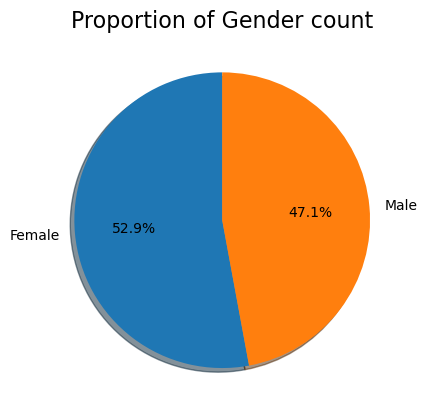

In [3]:
plt.pie(df['Gender'].value_counts(), labels = ['Female', 'Male'], autopct='%1.1f%%', shadow = True, startangle = 90)
plt.title('Proportion of Gender count', fontsize = 16)
plt.show()

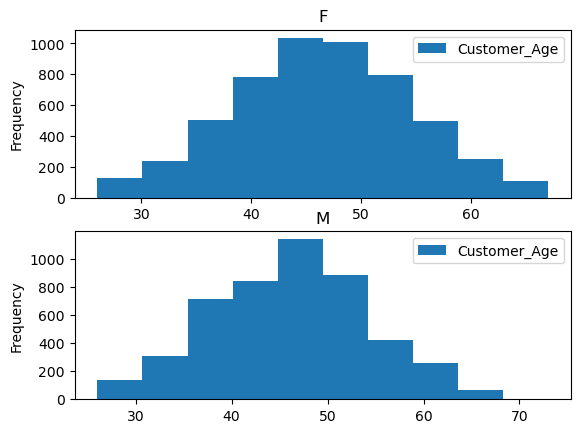

In [4]:
age_vs_gender = df.plot.hist(column=["Customer_Age"], by="Gender")
plt.show()

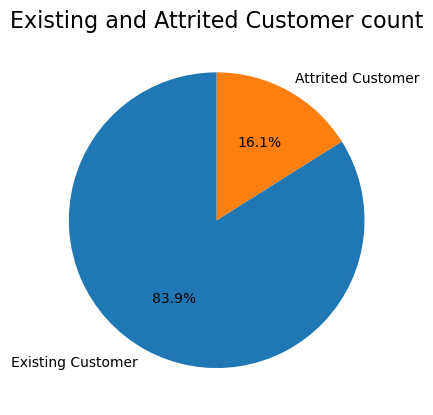

In [5]:
plt.pie(df['Attrition_Flag'].value_counts(), labels = ['Existing Customer', 'Attrited Customer'], 
        autopct='%1.1f%%', startangle = 90)
plt.title('Existing and Attrited Customer count', fontsize = 16)
plt.show()

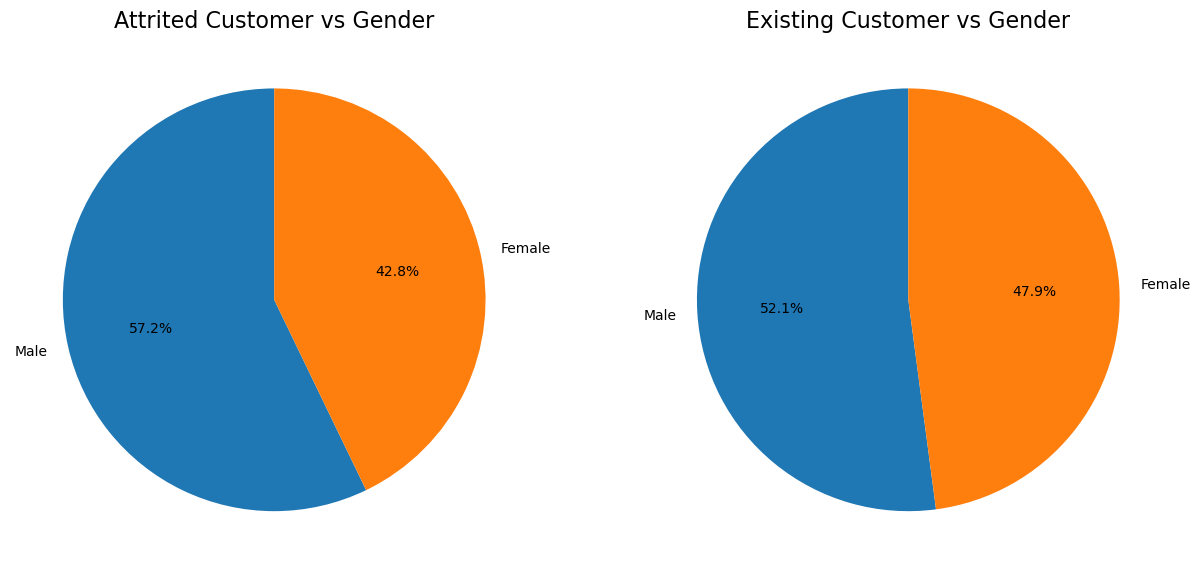

In [6]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))

attrited_gender = df.loc[df["Attrition_Flag"] == "Attrited Customer", ["Gender"]].value_counts().tolist()
ax1.pie(x=attrited_gender, labels=["Male", "Female"], autopct='%1.1f%%', startangle=90)
ax1.set_title('Attrited Customer vs Gender', fontsize=16)

existing_gender=df.loc[df["Attrition_Flag"] == "Existing Customer", ["Gender"]].value_counts().tolist()
ax2.pie(x=existing_gender,labels=["Male","Female"],autopct='%1.1f%%', startangle=90)
ax2.set_title('Existing Customer vs Gender', fontsize=16)
plt.show()

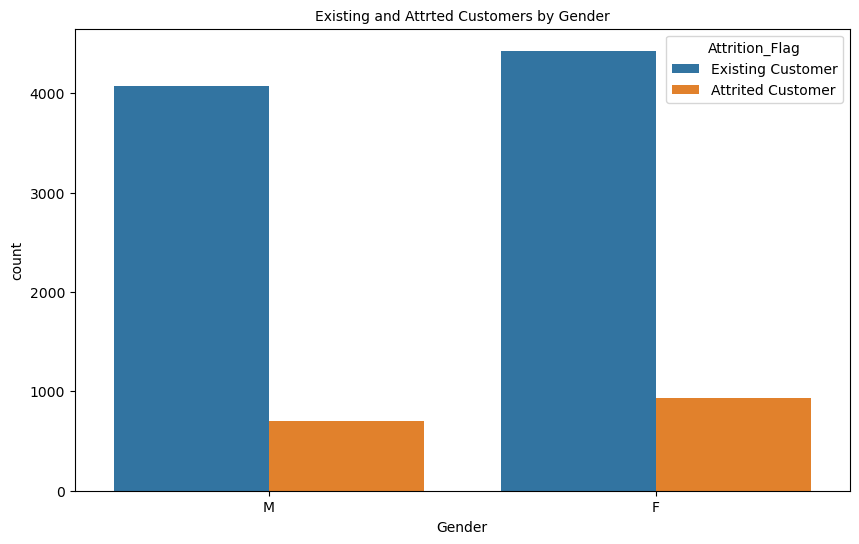

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', hue='Attrition_Flag', data=df)
plt.title('Existing and Attrted Customers by Gender', fontsize=10)
plt.show()

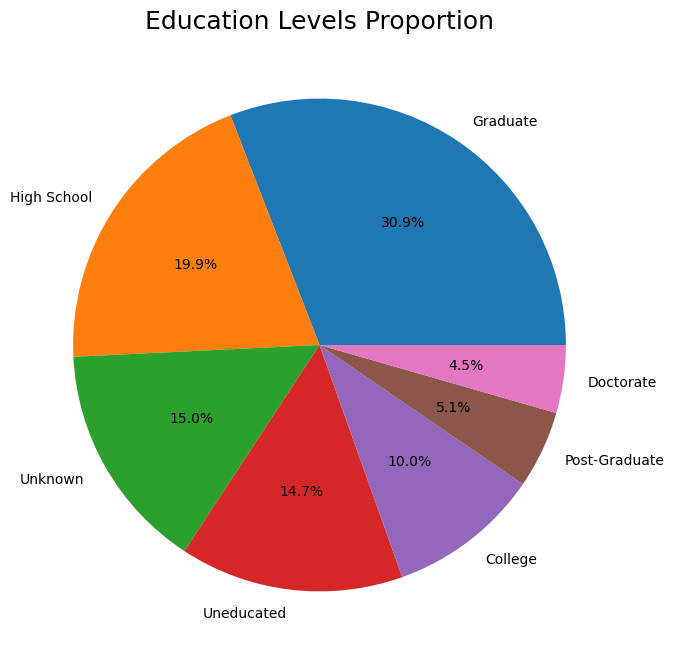

In [8]:
education = df['Education_Level'].value_counts().to_frame('Counts') 
plt.figure(figsize = (8,8))
plt.pie(education['Counts'], labels = education.index, autopct = '%1.1f%%')
plt.title('Education Levels Proportion', fontsize = 18)
plt.show()

Text(0.5, 1.0, 'Male vs Education Level')

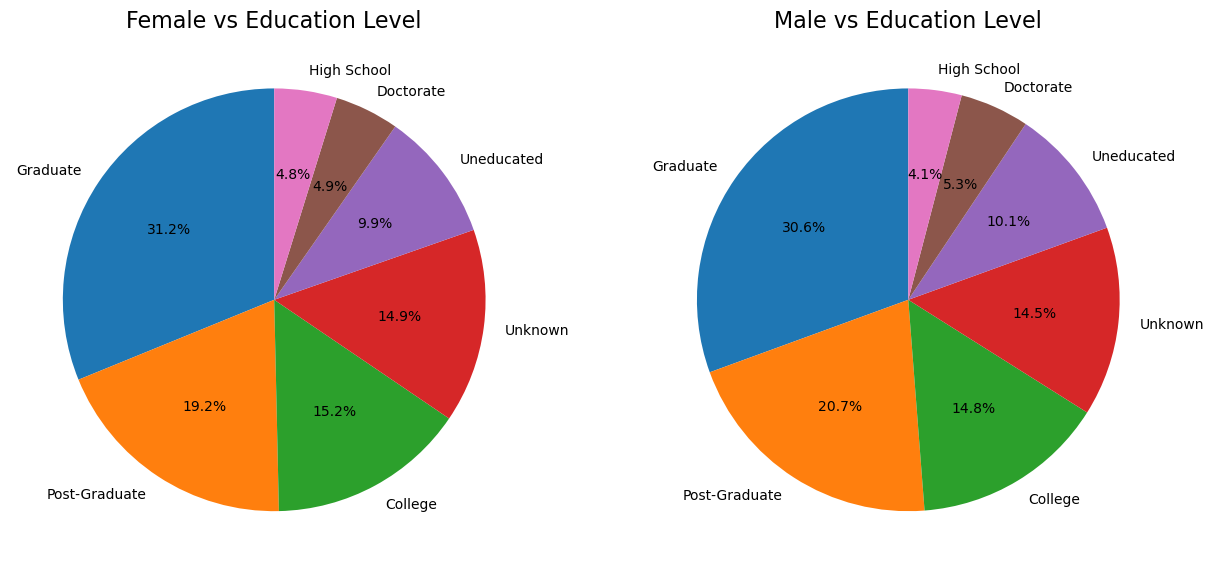

In [9]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))

attrited_eduprop = df.loc[df["Gender"] == "F", ["Education_Level"]].value_counts().tolist()
ax1.pie(x=attrited_eduprop, labels=['Graduate', 'Post-Graduate', 'College', 'Unknown', 'Uneducated',
                                     'Doctorate', 'High School'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Female vs Education Level', fontsize=16)

existing_eduprop = df.loc[df["Gender"] == "M", ["Education_Level"]].value_counts().tolist()
ax2.pie(x=existing_eduprop, labels=['Graduate', 'Post-Graduate', 'College', 'Unknown', 'Uneducated',
                                     'Doctorate', 'High School'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Male vs Education Level', fontsize=16)

Text(0.5, 1.0, 'Education Level by gender')

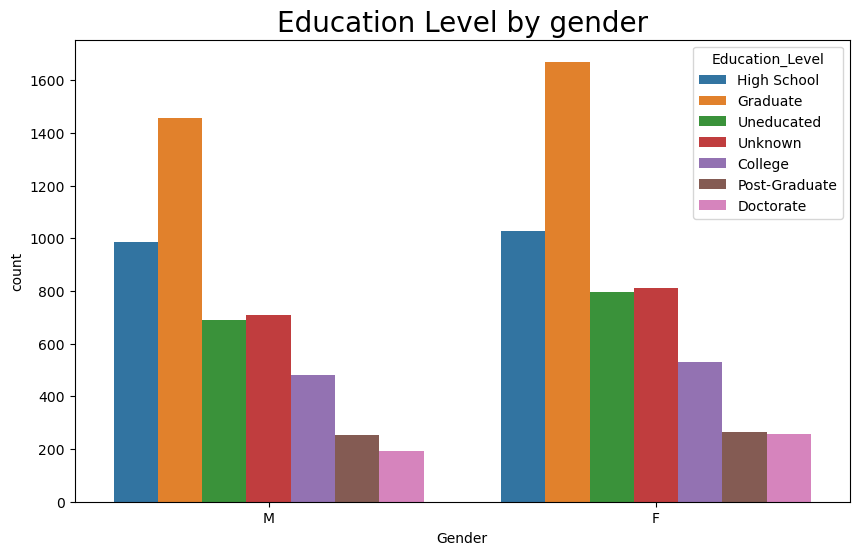

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', hue='Education_Level', data=df)
plt.title('Education Level by gender', fontsize=20)

Text(0.5, 1.0, 'Existing Customer vs Income Category')

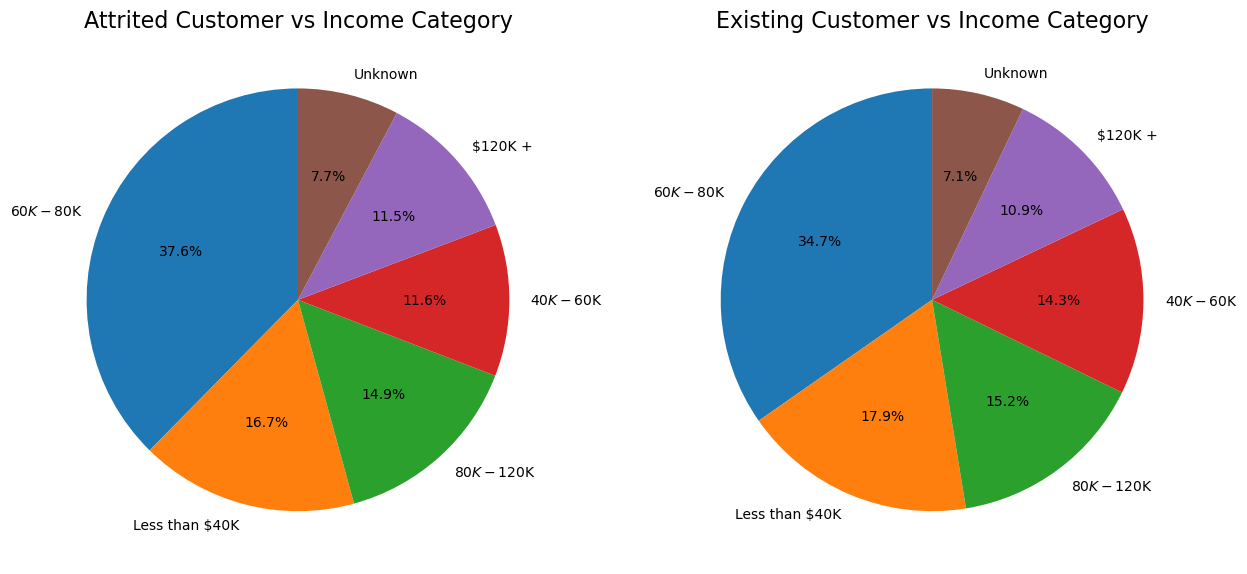

In [11]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))
count = Counter(df['Income_Category'])

attrited_inc = df.loc[df["Attrition_Flag"] == "Attrited Customer", ["Income_Category"]].value_counts().tolist()
ax1.pie(x=attrited_inc, labels=count, autopct='%1.1f%%', startangle=90)
ax1.set_title('Attrited Customer vs Income Category', fontsize=16)

existing_inc = df.loc[df["Attrition_Flag"] == "Existing Customer", ["Income_Category"]].value_counts().tolist()
ax2.pie(x=existing_inc, labels=count, autopct='%1.1f%%', startangle=90)
ax2.set_title('Existing Customer vs Income Category', fontsize=16)

<AxesSubplot:xlabel='Customer_Age', ylabel='count'>

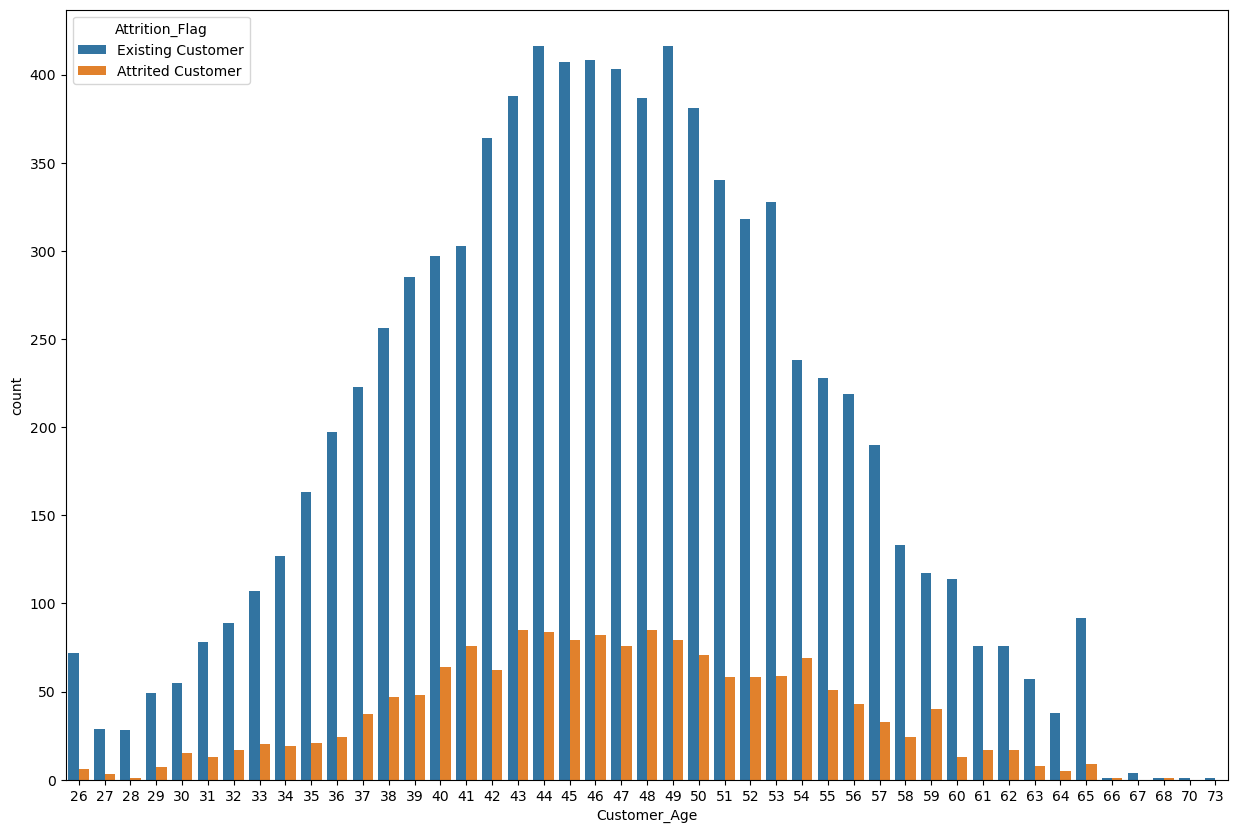

In [12]:
plt.figure(figsize=(15,10))
sns.countplot(x='Customer_Age', data=df, hue='Attrition_Flag')

In [13]:
df_categorical = df[['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']]
df_categorical.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue
2,M,Graduate,Married,$80K - $120K,Blue
3,F,High School,Unknown,Less than $40K,Blue
4,M,Uneducated,Married,$60K - $80K,Blue


In [18]:
df_numerical = df[['Customer_Age', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
                      'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                      'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
df_numerical.head()

,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
